In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.670102,0.663187,0.117607,0.122638,0.129273,0.139335,0.161839,0.182120,...,0.207095,0.198715,0.135337,0.034069,0.000958,0.000000,0.000000,0.000000,0.000000,0.807506
1,2,6.894754e-06,0.649246,0.595176,0.154860,0.162516,0.173177,0.194608,0.224042,0.251921,...,0.181898,0.059170,0.008149,0.000185,0.000000,0.000000,0.000000,0.000000,0.000000,0.910962
2,3,1.522987e-05,0.634188,0.614848,0.161369,0.163086,0.165350,0.170202,0.179566,0.190230,...,0.226165,0.253216,0.242801,0.102811,0.000817,0.000000,0.000000,0.000000,0.000000,0.742319
3,4,2.800000e-05,0.617392,0.708151,0.121318,0.127188,0.129631,0.126472,0.122668,0.120981,...,0.109541,0.099616,0.084380,0.061072,0.037861,0.013739,0.002531,0.000000,0.000000,0.749622
4,5,4.366489e-05,0.608074,0.980959,0.112924,0.119542,0.120754,0.117714,0.114673,0.112022,...,0.101057,0.088041,0.070809,0.051273,0.032537,0.017131,0.008547,0.002847,0.000159,0.679299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4.869946e-07,0.311900,0.397455,0.535807,0.550344,0.562034,0.571286,0.579292,0.587255,...,0.603004,0.610451,0.617502,0.625077,0.632572,0.638534,0.645666,0.645943,0.595730,0.935870
96,97,2.743041e-07,0.312907,0.396722,0.536646,0.550449,0.562180,0.571586,0.580052,0.588281,...,0.603508,0.611540,0.620375,0.628643,0.635929,0.643006,0.649212,0.651638,0.605878,0.935925
97,98,1.221970e-07,0.321326,0.400085,0.520919,0.535082,0.545895,0.555760,0.565115,0.573660,...,0.588759,0.596379,0.605408,0.614785,0.625242,0.633619,0.638981,0.642499,0.622488,0.933321
98,99,3.085853e-08,0.312028,0.400467,0.520477,0.534443,0.546152,0.556431,0.565258,0.573611,...,0.588478,0.596060,0.604720,0.613872,0.623525,0.632513,0.639026,0.641664,0.622133,0.933307


(0.3, 0.6)

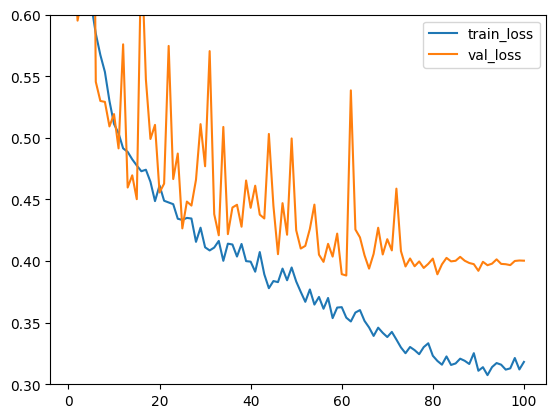

In [2]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.6)

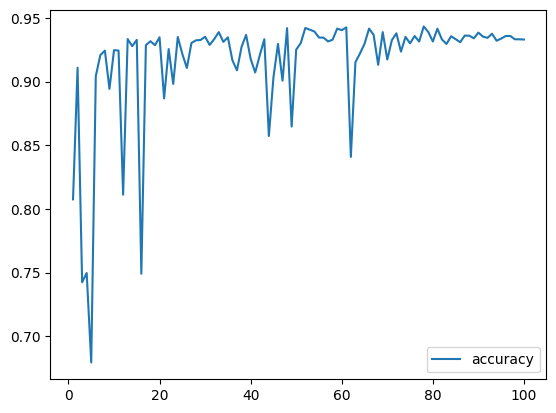

In [3]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

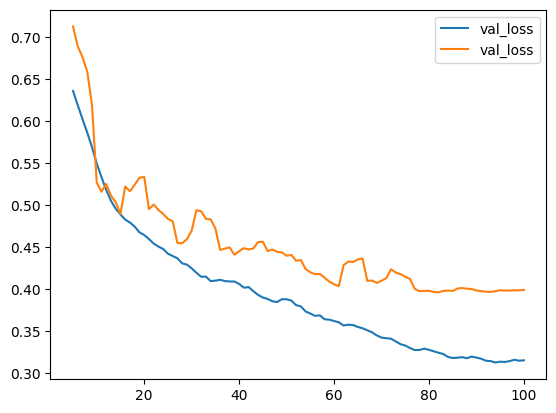

In [4]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(100, 16)


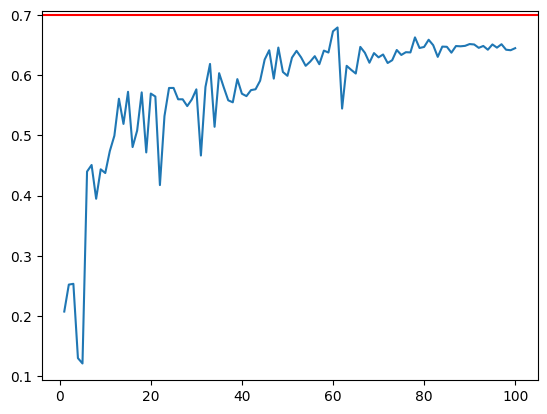

In [5]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')


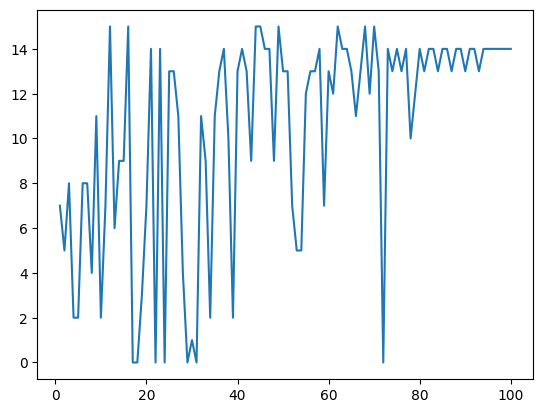

In [6]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")